In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
# Load the csv dataset to python
columns = list(range(1, 7))
Gt = np.loadtxt('Gieten_TrainingData.csv',delimiter = ',', skiprows = 1, usecols= columns)
print(Gt.shape)
print(Gt)

(96, 6)
[[ 0.0000e+00  3.9290e+01  8.6770e+01  4.7070e+01  8.7970e+01  2.4200e+00]
 [ 1.0000e+00  2.4210e+01  7.8040e+01  3.2930e+01  9.2290e+01  4.3200e+00]
 [ 1.0000e+01  3.2740e+01  1.1916e+02  2.4650e+01  8.0900e+01  1.3350e+01]
 [ 4.2000e+01  5.1400e+01  1.9007e+02  1.1000e-01  6.7670e+01  2.6800e+01]
 [ 4.2000e+01  7.9650e+01  1.8171e+02  4.2040e+01  7.7810e+01  2.6390e+01]
 [ 6.0000e+01  1.2700e+02  2.1933e+02  4.2770e+01  8.4700e+01  3.0130e+01]
 [ 5.7000e+01  1.2129e+02  2.0887e+02  5.3130e+01  8.4390e+01  2.7900e+01]
 [ 2.0000e+01  1.1261e+02  2.1516e+02  1.3330e+01  8.2940e+01  2.6060e+01]
 [ 8.0000e+00  9.4600e+01  1.7653e+02  2.6470e+01  8.6400e+01  1.5570e+01]
 [ 2.1000e+01  5.1350e+01  1.3197e+02  7.9100e+00  8.9100e+01  8.0000e+00]
 [ 3.0000e+00  3.4070e+01  8.8930e+01  2.6800e+01  9.0370e+01  3.1700e+00]
 [ 0.0000e+00  1.1520e+01  5.6810e+01  2.5620e+01  9.1840e+01  2.2300e+00]
 [ 0.0000e+00  3.1710e+01  7.9030e+01  4.2170e+01  8.7160e+01  2.1000e+00]
 [ 0.0000e+00  1.

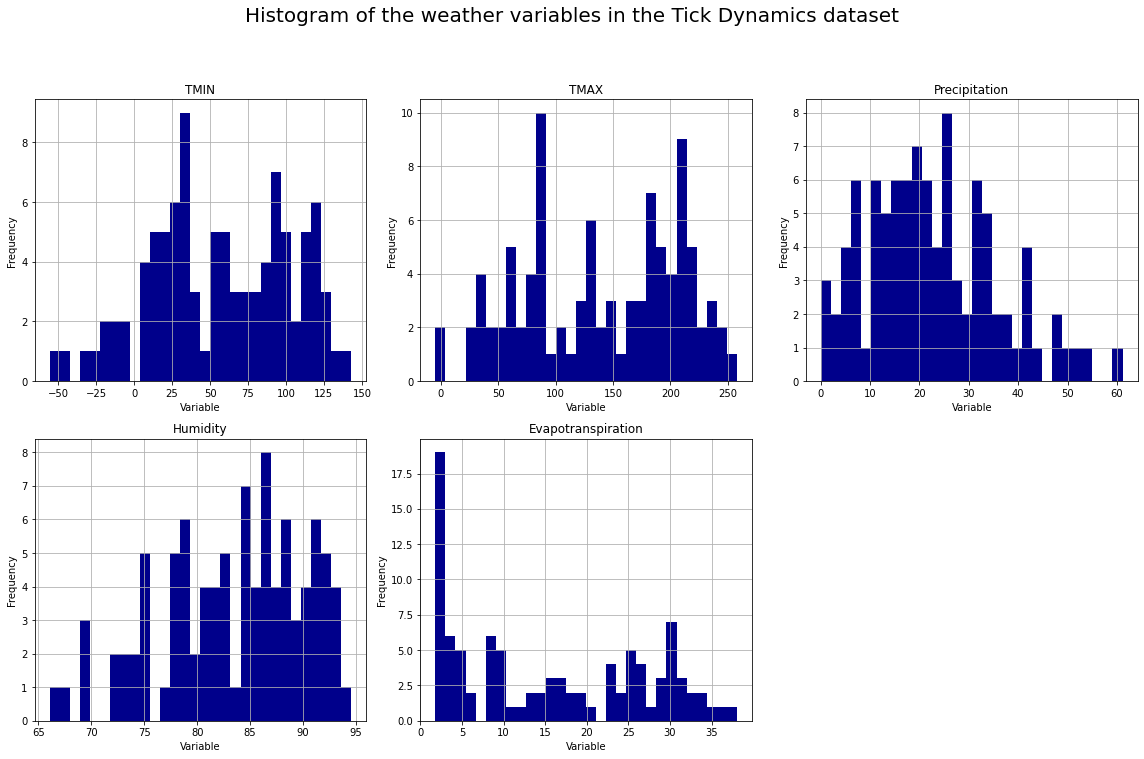

In [4]:
labels = ["TMIN", "TMAX", "Precipitation", "Humidity", "Evapotranspiration"]
fig,axs = plt.subplots(figsize=(16,10))
title= plt.suptitle('Histogram of the weather variables in the Tick Dynamics dataset', size=20)
title.set_position([.5, 1.05])
plt.subplots_adjust(hspace=1, wspace=1)
for i in range(1, 6):
    current_feature = Gt[:, i]
    plt.subplot(2, 3, i)
    plt.title(labels[i - 1], size=12)
    plt.hist(current_feature, bins=30, color="darkblue")
    plt.xlabel("Variable", size=10)
    plt.ylabel("Frequency", size=10)
    plt.grid()
    plt.tight_layout()
plt.show()

In [7]:
# Separate the raw matrices into X(independent variables: weather data) and Y(dependent variables: tick count)
# independent variables (weather data columns)
Gt_x = Gt[:,1:]

# dependent variable (tick count)
Gt_y = Gt[:,0]

print(Gt_x)

print(Gt_y)


[[ 3.9290e+01  8.6770e+01  4.7070e+01  8.7970e+01  2.4200e+00]
 [ 2.4210e+01  7.8040e+01  3.2930e+01  9.2290e+01  4.3200e+00]
 [ 3.2740e+01  1.1916e+02  2.4650e+01  8.0900e+01  1.3350e+01]
 [ 5.1400e+01  1.9007e+02  1.1000e-01  6.7670e+01  2.6800e+01]
 [ 7.9650e+01  1.8171e+02  4.2040e+01  7.7810e+01  2.6390e+01]
 [ 1.2700e+02  2.1933e+02  4.2770e+01  8.4700e+01  3.0130e+01]
 [ 1.2129e+02  2.0887e+02  5.3130e+01  8.4390e+01  2.7900e+01]
 [ 1.1261e+02  2.1516e+02  1.3330e+01  8.2940e+01  2.6060e+01]
 [ 9.4600e+01  1.7653e+02  2.6470e+01  8.6400e+01  1.5570e+01]
 [ 5.1350e+01  1.3197e+02  7.9100e+00  8.9100e+01  8.0000e+00]
 [ 3.4070e+01  8.8930e+01  2.6800e+01  9.0370e+01  3.1700e+00]
 [ 1.1520e+01  5.6810e+01  2.5620e+01  9.1840e+01  2.2300e+00]
 [ 3.1710e+01  7.9030e+01  4.2170e+01  8.7160e+01  2.1000e+00]
 [ 1.2280e+01  8.3310e+01  1.5440e+01  8.2450e+01  6.2400e+00]
 [ 1.9770e+01  8.5740e+01  3.9100e+01  8.1610e+01  9.5500e+00]
 [ 3.0400e+01  1.3357e+02  7.7700e+00  7.4630e+01  1.99

In [346]:
# obtain a training set containing 50% of the samples and a test set containing 50% of the samples
xtrain, xtest, ytrain, ytest = train_test_split(Gt_x, Gt_y, test_size=0.30)

#print(xtrain)
#print(xtest)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(67, 5) (67,) (29, 5) (29,)


### Random Forest Algorithm

In [347]:
# Apply RF( rf is an object for random forest regression model)
# create the random forest object
rf = RandomForestRegressor(n_estimators =100, max_depth = None, max_features = "auto", bootstrap = True, 
                            min_samples_split =2, n_jobs =1)

# train the random forest object with the training dataset
rf.fit(xtrain, ytrain)

# predict the dependent variable of the test dataset
ypred = rf.predict(xtest)
r2_rf = r2_score(ytest,ypred)
print("The R2 score generated by Random Forest is", r2_rf)


The R2 score generated by Random Forest is 0.5911603910729051


In [348]:
labels = ["TMIN", "TMAX", "Precipitation", "Humidity", "Evapotranspiration"]
FI_rf = list(zip(labels, rf.feature_importances_))
print(FI_rf)

# To make it more clear, let's sort the list based on the feature importance values
sorted_FI_rf = sorted(FI_rf, key=lambda x:x[1])
print("\n"+"The feature importance of each predictor by order is:", sorted_FI_rf)


[('TMIN', 0.3616097120832197), ('TMAX', 0.3021646207589813), ('Precipitation', 0.11337846526901538), ('Humidity', 0.10259470716264896), ('Evapotranspiration', 0.12025249472613463)]

The feature importance of each predictor by order is: [('Humidity', 0.10259470716264896), ('Precipitation', 0.11337846526901538), ('Evapotranspiration', 0.12025249472613463), ('TMAX', 0.3021646207589813), ('TMIN', 0.3616097120832197)]


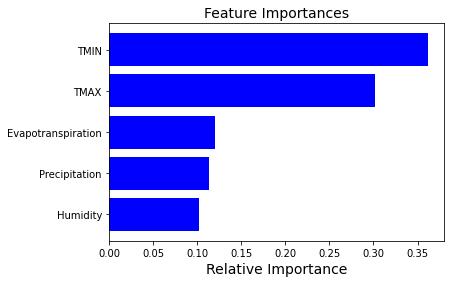

In [349]:

features = labels
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=14)
plt.show()



In [203]:
print(ypred)

[ 41.06  78.    62.6   85.16  66.09   3.3    2.18  47.08 156.91   4.79
   2.68 261.55   6.01  12.66  12.47  58.16 220.56  10.29 280.34 220.03
   0.58  56.39 104.43   2.86   8.25  46.41 277.6   10.43   8.12]


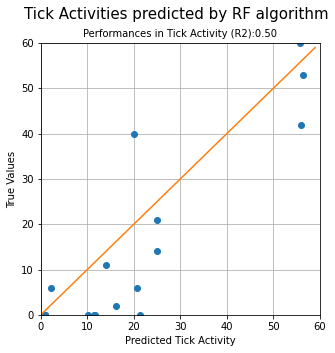

In [350]:
f, (ax1) = plt.subplots(1, 1, figsize=(5,5))

a = range(0,60)
b = a

ax1.set_xlim(0,60)
ax1.set_ylim(0,60)
ax1.plot(ypred,ytest,'o')
ax1.plot(a,b,)
ax1.set_xlabel("Predicted Tick Activity",fontsize=10)
ax1.set_ylabel("True Values",fontsize=10)
ax1.set_title("Performances in Tick Activity (R2):0.59",fontsize=10)
ax1.grid()


plt.suptitle("Tick Activities predicted by RF algorithm",fontsize=15)
plt.savefig(r"D:\UTwente_ITC\Quartile_4\Spatio_Temporal_Analytics\Assignment\ML")

In [351]:
pre_Gt = np.loadtxt('Gieten_2016.csv',delimiter = ',', skiprows = 1, usecols=range(1,6))
print(pre_Gt)

[[1.1480e+01 5.7390e+01 3.8140e+01 8.7740e+01 2.5800e+00]
 [7.0000e-02 5.9860e+01 1.7160e+01 8.8210e+01 5.9300e+00]
 [1.4550e+01 9.9130e+01 2.3070e+01 8.2900e+01 1.1810e+01]
 [2.4800e+01 1.3720e+02 1.0270e+01 7.8700e+01 2.2070e+01]
 [6.0290e+01 1.6326e+02 2.5910e+01 7.4870e+01 2.5000e+01]
 [8.2970e+01 1.9397e+02 1.6380e+01 7.6670e+01 3.1700e+01]
 [1.2677e+02 2.2874e+02 4.7070e+01 8.1130e+01 3.3130e+01]
 [1.2048e+02 2.3332e+02 3.9100e+01 8.2000e+01 2.8390e+01]
 [8.6530e+01 1.7710e+02 1.8540e+01 8.7100e+01 1.6500e+01]
 [5.6710e+01 1.3210e+02 1.3520e+01 9.0520e+01 8.2300e+00]
 [6.3470e+01 1.1693e+02 5.1270e+01 8.8100e+01 3.9000e+00]
 [6.6740e+01 1.1239e+02 1.9390e+01 8.6420e+01 2.8400e+00]
 [4.8100e+00 5.3480e+01 3.2390e+01 9.0000e+01 2.9000e+00]
 [1.2310e+01 7.1000e+01 3.6930e+01 8.6070e+01 6.1000e+00]
 [1.1680e+01 8.8350e+01 1.9840e+01 8.4610e+01 1.0770e+01]
 [3.0230e+01 1.2743e+02 2.2900e+01 7.9900e+01 1.9630e+01]
 [8.7900e+01 1.9732e+02 1.1910e+01 7.2130e+01 3.0900e+01]
 [1.2373e+02 2

In [352]:
tick_2016 = rf.predict(pre_Gt)
print(tick_2016)

[  8.94   0.87  22.6   30.76  75.14 109.33  62.    98.63  61.17  30.94
  74.55  48.27   2.24   8.58   1.98  36.73 104.96  85.57  79.26  98.28
 167.93  23.89   2.14   2.39]


In [353]:
np.savetxt(r"D:\UTwente_ITC\Quartile_4\Spatio_Temporal_Analytics\Assignment\ML\tick_activity2016.csv",tick_2016)